In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
low_memory=False

In [2]:
startName = 'dados/Focos_'
filenames = {'2003-01-01_2003-12-31', '2004-01-01_2004-12-31', '2005-01-01_2005-12-31', '2006-01-01_2006-12-31'}
extension = '.csv'

In [3]:
def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv(startName+file+extension))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [4]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2006/01/01 01:40:00,TERRA_M-M,Brasil,MARANHAO,ACAILANDIA,Amazonia,NaN,NaN,NaN,-4.6820,-47.8320,NaN
1,1,2006/01/01 01:40:00,TERRA_M-M,Brasil,MARANHAO,ACAILANDIA,Amazonia,NaN,NaN,NaN,-4.6800,-47.8230,NaN
2,2,2006/01/01 14:04:00,TERRA_M-T,Brasil,PARA,IPIXUNA DO PARA,Amazonia,NaN,NaN,NaN,-2.5330,-47.7050,NaN
3,3,2006/01/01 14:07:00,TERRA_M-T,Brasil,MATO GROSSO,ARAGUAIANA,Cerrado,NaN,NaN,NaN,-15.7570,-51.9900,NaN
4,4,2006/01/01 14:09:00,TERRA_M-T,Brasil,MATO GROSSO DO SUL,RIBAS DO RIO PARDO,Cerrado,NaN,NaN,NaN,-21.2470,-53.6390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869635,1075026,2005/12/31 20:31:33,NOAA-15,Brasil,MARANHAO,ALTAMIRA DO MARANHAO,Amazonia,NaN,NaN,NaN,-4.0333,-45.5466,NaN
3869636,1075027,2005/12/31 20:31:33,NOAA-15,Brasil,CEARA,TEJUCUOCA,Caatinga,NaN,NaN,NaN,-3.8350,-39.5416,NaN
3869637,1075028,2005/12/31 20:31:33,NOAA-15,Brasil,MARANHAO,SANTA LUZIA,Amazonia,NaN,NaN,NaN,-4.4650,-45.8166,NaN
3869638,1075029,2005/12/31 20:31:33,NOAA-15,Brasil,MARANHAO,ALTAMIRA DO MARANHAO,Amazonia,NaN,NaN,NaN,-4.0350,-45.5566,NaN


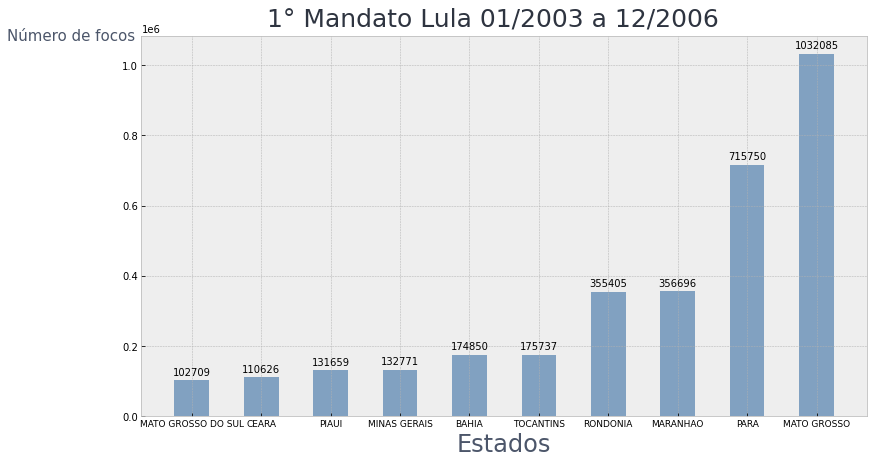

In [52]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Lula 01/2003 a 12/2006',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

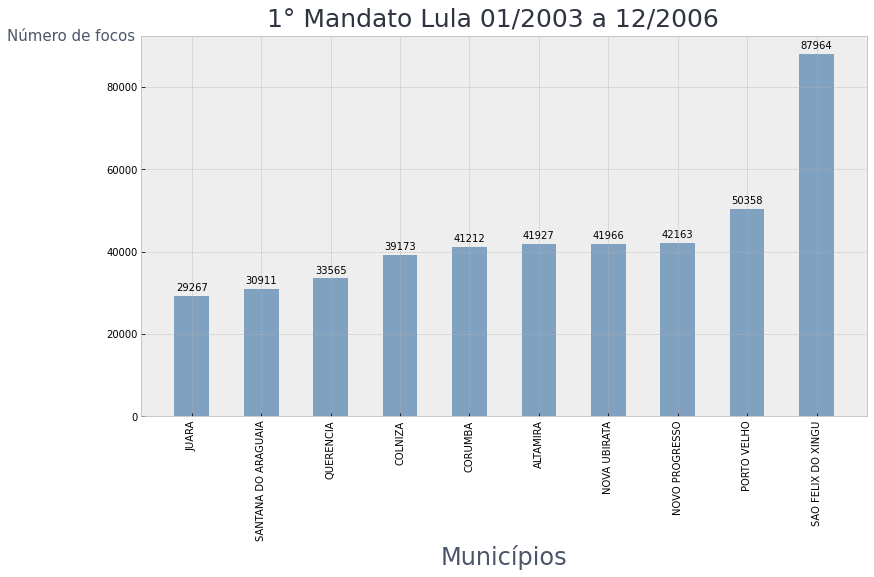

In [33]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Lula 01/2003 a 12/2006',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

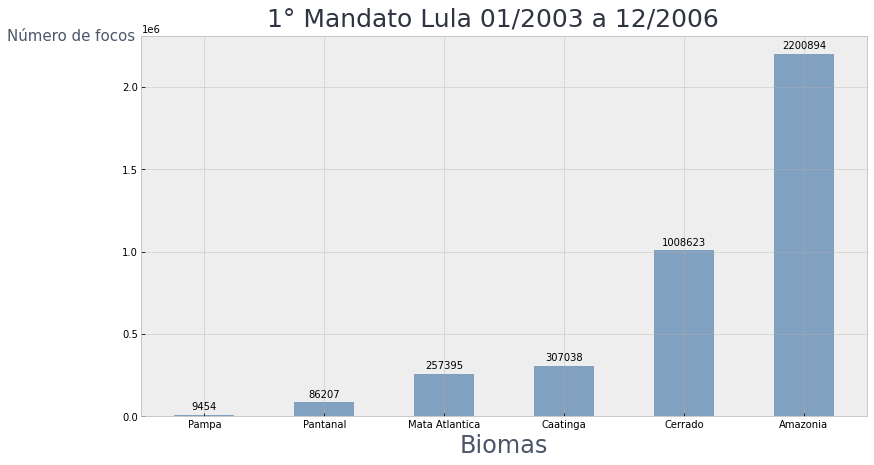

In [35]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Lula 01/2003 a 12/2006',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [53]:
filenames = {'2007-01-01_2007-12-31', '2008-01-01_2008-12-31', '2009-01-01_2009-12-31', '2010-01-01_2010-12-31'}

In [54]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2009/01/01 00:51:00,TERRA_M-M,Brasil,SERGIPE,SAO FRANCISCO,Mata Atlantica,NaN,NaN,NaN,-10.3860,-36.8990,NaN
1,1,2009/01/01 00:51:00,TERRA_M-M,Brasil,SERGIPE,SAO FRANCISCO,Mata Atlantica,NaN,NaN,NaN,-10.3860,-36.9040,NaN
2,2,2009/01/01 00:51:00,TERRA_M-M,Brasil,SERGIPE,CANHOBA,Mata Atlantica,NaN,NaN,NaN,-10.2190,-36.9520,NaN
3,3,2009/01/01 00:52:00,TERRA_M-M,Brasil,ALAGOAS,JOAQUIM GOMES,Mata Atlantica,NaN,NaN,NaN,-9.0770,-35.7460,NaN
4,4,2009/01/01 00:52:00,TERRA_M-M,Brasil,PERNAMBUCO,CABO DE SANTO AGOSTINHO,Mata Atlantica,NaN,NaN,NaN,-8.2150,-35.0360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327185,1153804,2007/12/31 20:49:02,NOAA-15,Brasil,SAO PAULO,TAMBAU,Cerrado,NaN,NaN,NaN,-21.6766,-47.2716,NaN
3327186,1153805,2007/12/31 20:49:02,NOAA-15,Brasil,SAO PAULO,TAMBAU,Cerrado,NaN,NaN,NaN,-21.6750,-47.2600,NaN
3327187,1153806,2007/12/31 20:49:02,NOAA-15,Brasil,BAHIA,SAO DESIDERIO,Cerrado,NaN,NaN,NaN,-12.9866,-45.9416,NaN
3327188,1153807,2007/12/31 20:49:02,NOAA-15,Brasil,MATO GROSSO DO SUL,TRES LAGOAS,Cerrado,NaN,NaN,NaN,-20.5650,-52.1750,NaN


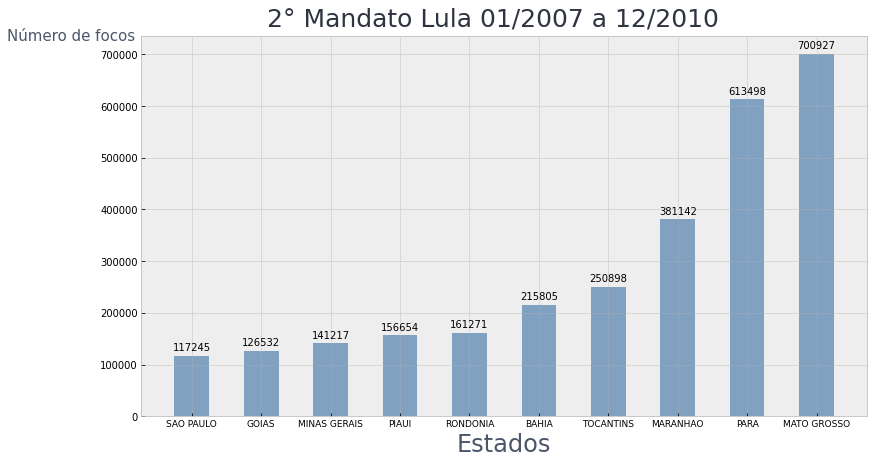

In [55]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Lula 01/2007 a 12/2010',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

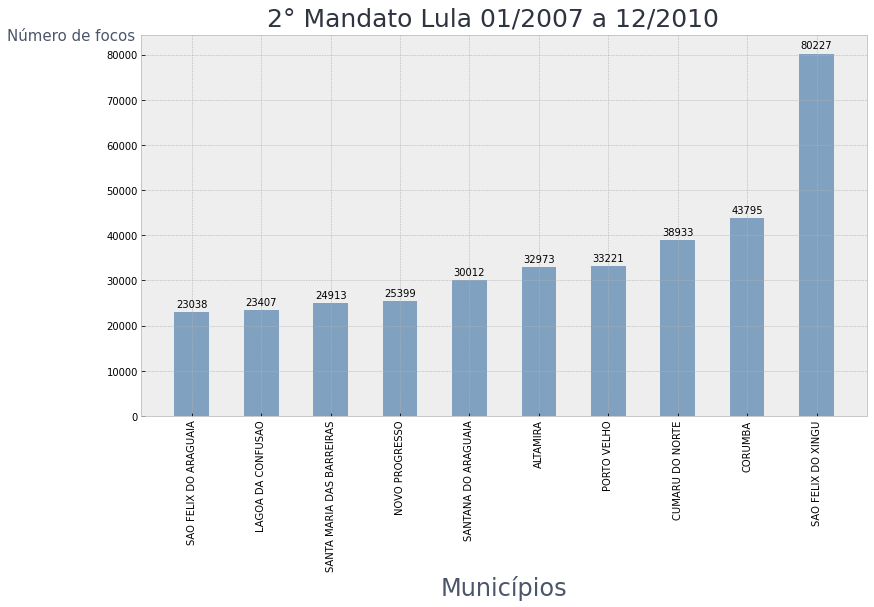

In [57]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Lula 01/2007 a 12/2010',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

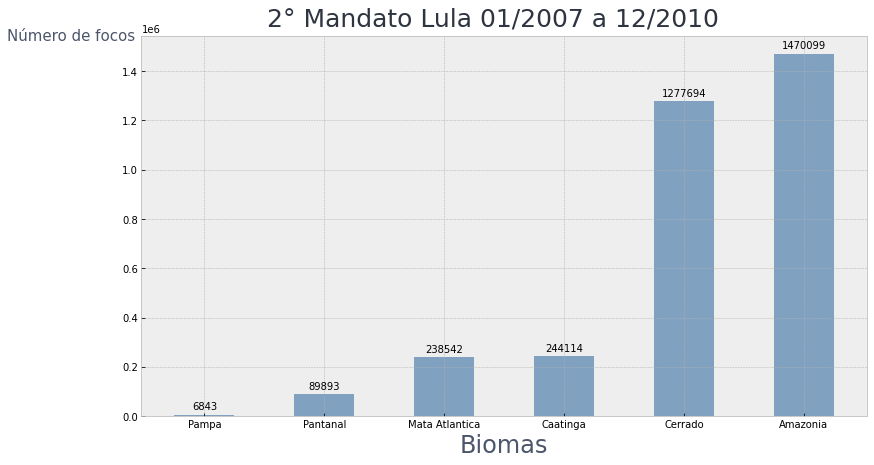

In [58]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Lula 01/2007 a 12/2010',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [59]:
filenames = {'2011-01-01_2011-12-31', '2012-01-01_2012-12-31', '2013-01-01_2013-12-31', '2014-01-01_2014-12-31'}

In [60]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2012/10/05 17:15:00,AQUA_M-T,Brasil,BAHIA,COCOS,Cerrado,NaN,NaN,NaN,-14.2980,-45.2840,NaN
1,1,2012/09/25 16:40:00,AQUA_M-T,Brasil,CEARA,QUIXELO,Caatinga,NaN,NaN,NaN,-6.1420,-38.9910,NaN
2,2,2012/08/24 16:40:00,AQUA_M-T,Brasil,PIAUI,URUCUI,Cerrado,NaN,NaN,NaN,-7.5400,-44.4470,NaN
3,3,2012/09/16 16:44:00,AQUA_M-T,Brasil,BAHIA,COCOS,Cerrado,NaN,NaN,NaN,-14.2620,-44.7760,NaN
4,4,2012/09/14 16:58:00,AQUA_M-T,Brasil,PIAUI,CANAVIEIRA,Cerrado,NaN,NaN,NaN,-7.5990,-43.6060,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236107,1301618,2013/01/01 15:36:00,NPP-375,Brasil,BAHIA,LAJEDAO,Mata Atlantica,NaN,NaN,NaN,-17.4459,-40.2799,NaN
6236108,1301619,2013/09/16 16:43:00,NPP-375,Brasil,GOIAS,ARUANA,Cerrado,NaN,NaN,NaN,-14.3947,-50.9899,NaN
6236109,1301620,2013/09/16 16:43:00,NPP-375,Brasil,GOIAS,ARUANA,Cerrado,NaN,NaN,NaN,-14.3909,-50.9904,NaN
6236110,1301621,2013/10/03 16:24:00,NPP-375,Brasil,GOIAS,NOVA CRIXAS,Cerrado,NaN,NaN,NaN,-13.8153,-50.8568,NaN


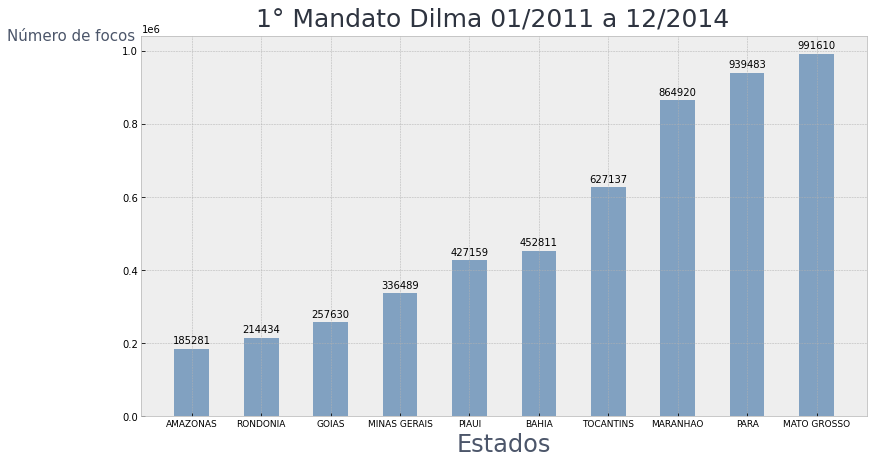

In [61]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Dilma 01/2011 a 12/2014',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

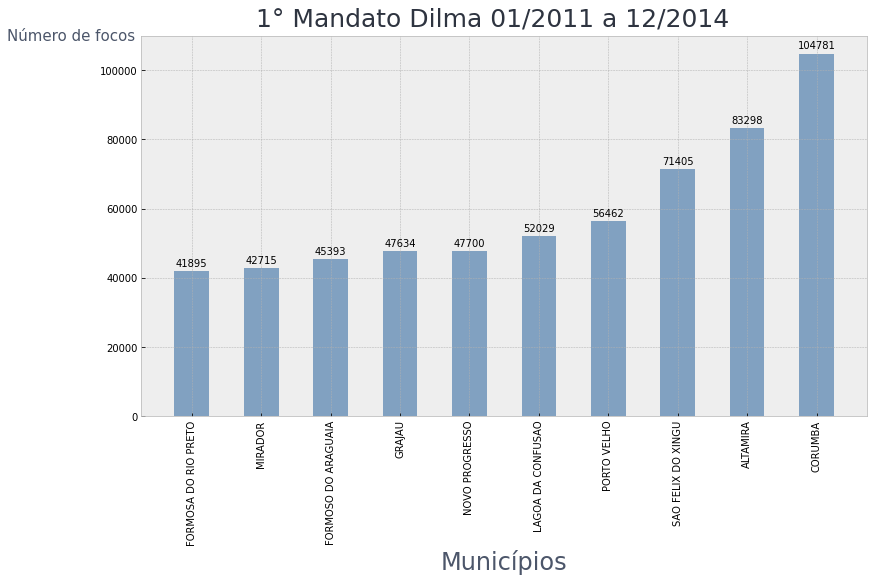

In [63]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Dilma 01/2011 a 12/2014',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

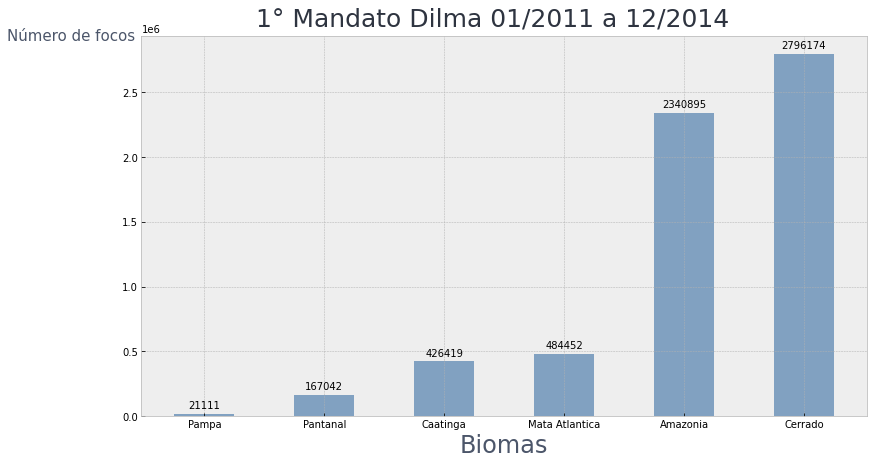

In [64]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Dilma 01/2011 a 12/2014',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [65]:
filenames = {'2015-01-01_2015-12-31', '2016-01-01_2016-08-31'}

In [67]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2016/01/01 04:14:00,NPP-375,Brasil,PARA,MONTE ALEGRE,Amazonia,7,2.2,1.0,-1.9161,-54.4058,NaN
1,1,2016/01/01 16:31:00,AQUA_M-T,Brasil,MINAS GERAIS,TAQUARACU DE MINAS,Cerrado,2,0.1,0.1,-19.5750,-43.5930,NaN
2,2,2016/01/01 12:30:00,GOES-13,Brasil,BAHIA,BAIANOPOLIS,Cerrado,1,0.0,0.9,-12.7500,-44.5500,NaN
3,3,2016/01/01 12:00:00,GOES-13,Brasil,BAHIA,PARAMIRIM,Caatinga,2,3.6,0.6,-13.4600,-42.1900,NaN
4,4,2016/01/01 12:30:00,GOES-13,Brasil,BAHIA,BAIANOPOLIS,Cerrado,0,0.0,0.8,-12.7500,-44.6000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535743,2639156,2015/08/25 04:37:00,NPP-375,Brasil,MATO GROSSO,ARIPUANA,Amazonia,4,0.0,1.0,-9.3873,-60.3237,NaN
3535744,2639157,2015/08/25 17:13:00,NPP-375,Brasil,RONDONIA,PORTO VELHO,Amazonia,6,0.0,1.0,-9.8225,-64.5910,NaN
3535745,2639158,2015/08/25 04:38:00,NPP-375,Brasil,MATO GROSSO,POXOREU,Cerrado,33,0.0,1.0,-15.6709,-53.9400,NaN
3535746,2639159,2015/08/25 17:14:00,NPP-375,Brasil,AMAZONAS,BERURI,Amazonia,3,0.2,0.5,-3.7902,-61.3111,NaN


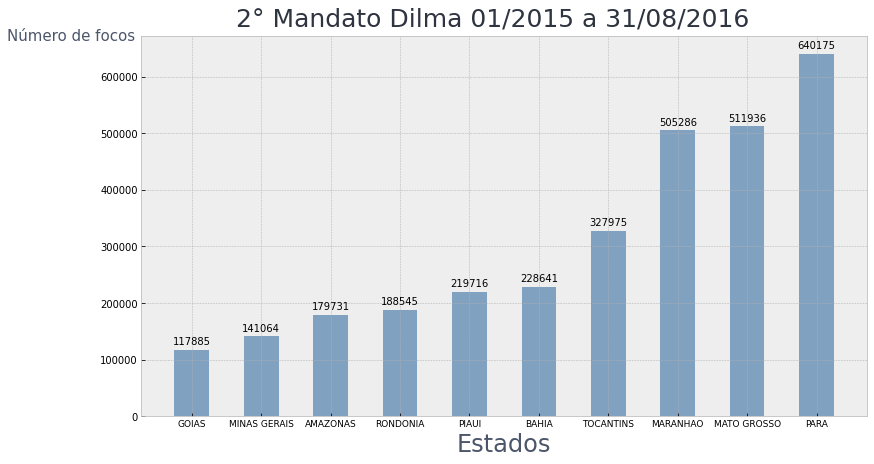

In [68]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Dilma 01/2015 a 31/08/2016',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

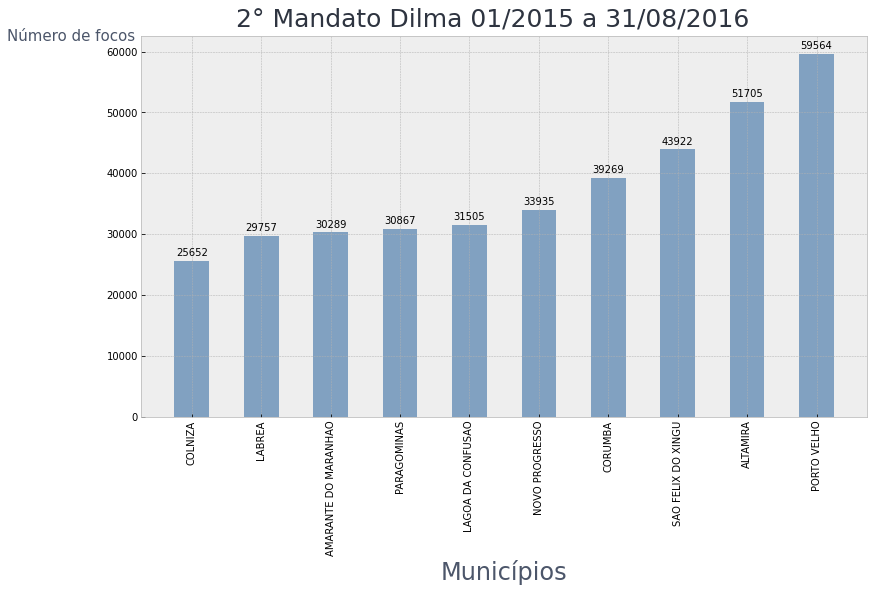

In [69]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Dilma 01/2015 a 31/08/2016',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

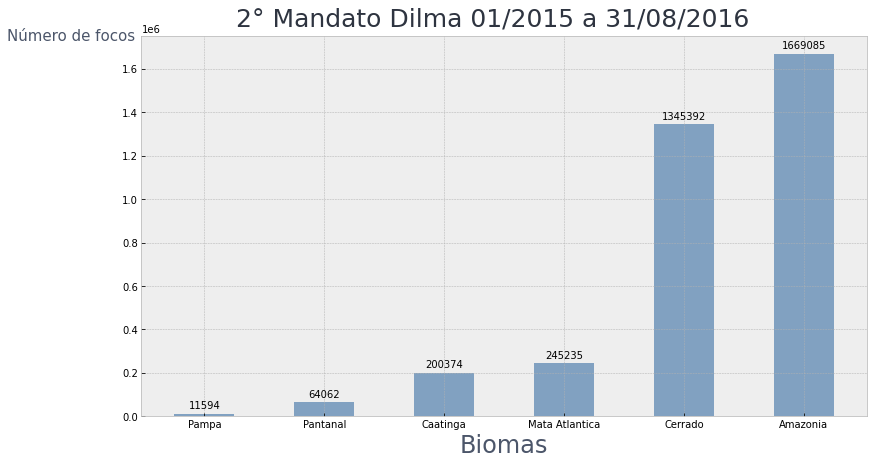

In [70]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'2° Mandato Dilma 01/2015 a 31/08/2016',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [71]:
filenames = {'2016-09-01_2016-12-31', '2017-01-01_2017-12-31', '2018-01-01_2018-12-31'}

In [72]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2018/01/01 00:29:09,GOES-13,Brasil,AMAZONAS,MAUES,Amazonia,0.0,6.9,-999.0,-3.2200,-57.7200,NaN
1,1,2018/01/01 18:59:41,GOES-13,Brasil,PARA,ITAITUBA,Amazonia,0.0,0.0,0.0,-5.4300,-57.4500,NaN
2,2,2018/01/01 04:06:00,NPP-375,Brasil,DISTRITO FEDERAL,BRASILIA,Cerrado,0.0,6.8,-999.0,-15.5687,-47.8568,NaN
3,3,2018/01/01 04:06:00,NPP-375,Brasil,CEARA,CHOROZINHO,Caatinga,0.0,0.6,1.0,-4.3083,-38.3916,NaN
4,4,2018/01/01 04:06:00,NPP-375,Brasil,CEARA,CAUCAIA,Caatinga,0.0,0.5,0.8,-3.6746,-38.7168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760999,2865164,2017/12/31 17:04:00,NPP-375,Brasil,PIAUI,MIGUEL ALVES,Cerrado,0.0,0.0,0.3,-4.1932,-42.9022,NaN
5761000,2865165,2017/12/31 17:04:00,NPP-375,Brasil,MARANHAO,BREJO,Cerrado,0.0,0.0,0.2,-3.7722,-42.8217,NaN
5761001,2865166,2017/12/31 17:04:00,NPP-375,Brasil,MARANHAO,SANTA QUITERIA DO MARANHAO,Cerrado,0.0,0.3,0.3,-3.4372,-43.0585,NaN
5761002,2865167,2017/12/31 17:04:00,NPP-375,Brasil,CEARA,GRANJA,Caatinga,0.0,0.0,0.5,-3.3940,-41.0102,NaN


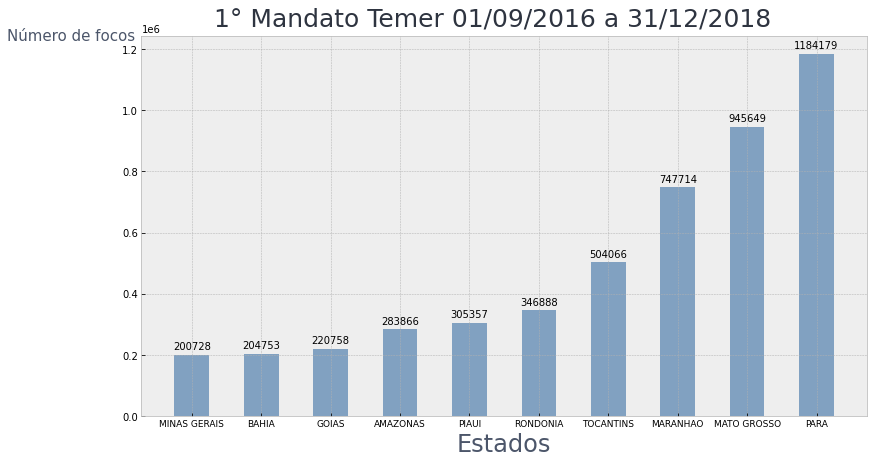

In [73]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Temer 01/09/2016 a 31/12/2018',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

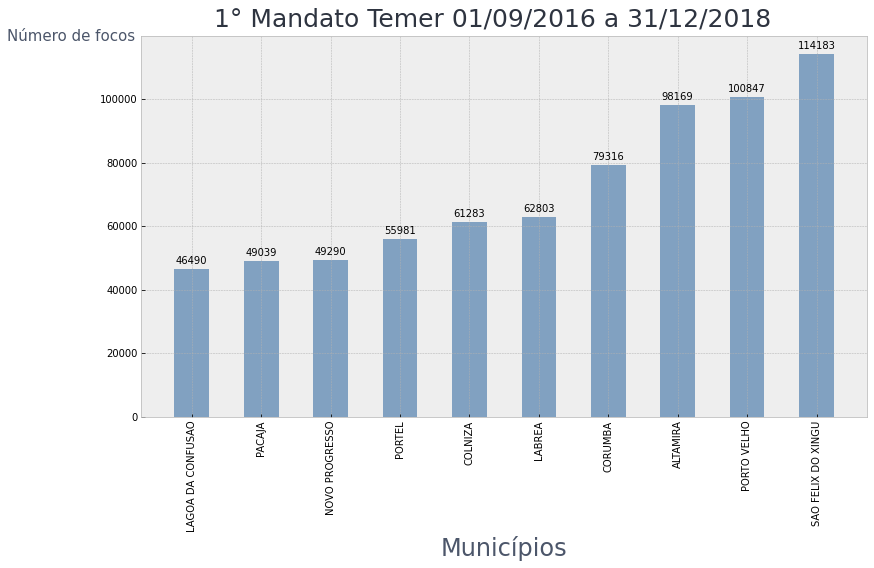

In [74]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Temer 01/09/2016 a 31/12/2018',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

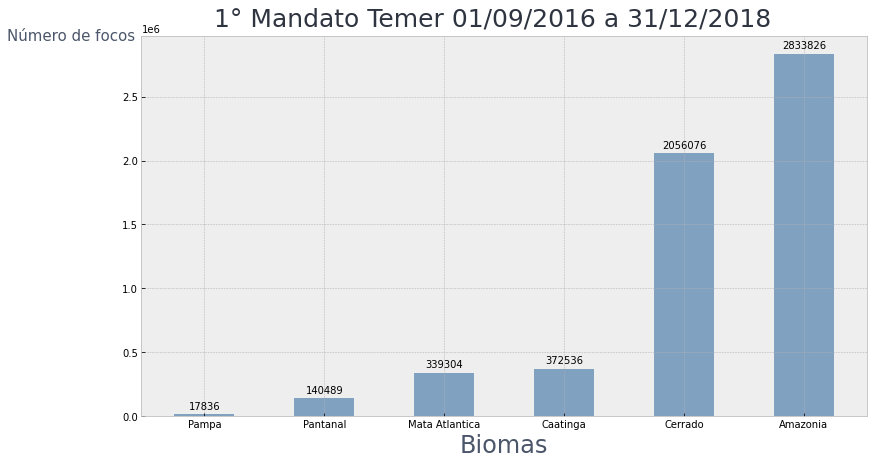

In [75]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Temer 01/09/2016 a 31/12/2018',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

In [78]:
filenames = {'2019-01-01_2019-12-31', '2020-01-01_2020-11-24'}

In [79]:
df = populaDataFrame()
df.reset_index()

,index,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,0,2019/10/27 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,6.0,0.0,-999.0,-19.6730,-57.5443,2.8
1,1,2019/10/27 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,6.0,0.0,1.0,-19.6445,-57.5361,1.7
2,2,2019/10/27 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,6.0,0.0,0.9,-19.6478,-57.5367,1.7
3,3,2019/10/27 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,6.0,0.0,0.8,-19.6484,-57.5330,1.7
4,4,2019/10/27 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,6.0,0.0,0.7,-19.6589,-57.5311,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997925,4956871,2020/10/25 21:45:05,GOES-16,Brasil,PARA,URUARA,Amazonia,9.0,0.0,0.8,-3.8200,-53.7200,NaN
8997926,4956872,2020/10/25 21:45:05,GOES-16,Brasil,PARA,URUARA,Amazonia,3.0,0.0,0.5,-3.5300,-54.1900,NaN
8997927,4956873,2020/10/07 02:20:00,TERRA_M-M,Brasil,MATO GROSSO,POCONE,Pantanal,4.0,4.4,0.4,-17.7340,-57.1930,24.0
8997928,4956874,2020/10/07 02:20:00,TERRA_M-M,Brasil,MATO GROSSO,POCONE,Pantanal,4.0,4.0,0.4,-17.7350,-57.2030,23.4


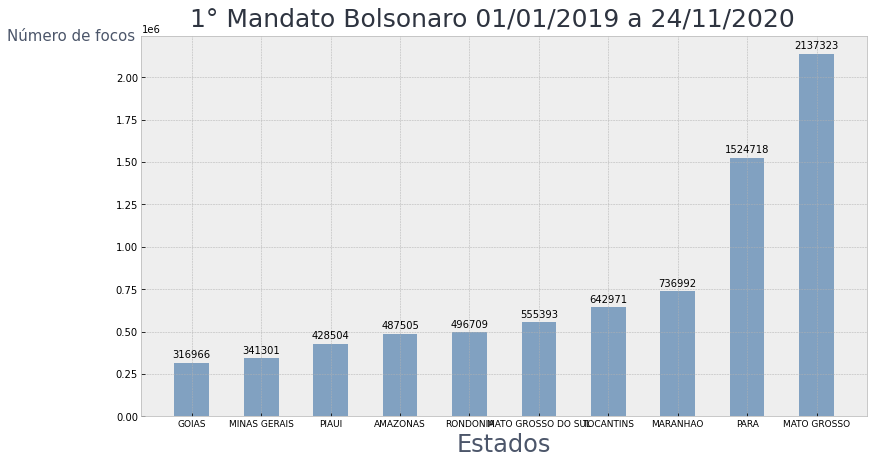

In [80]:
focos = df.groupby('estado').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

estados = list(n_focos.keys())
estados = list(dict.fromkeys(estados))
dados_grafico = {'estados': [], 'focos': []}
for estado in estados:
    if(estado in n_focos.keys()):
        dados_grafico['estados'].append(estado)
        dados_grafico['focos'].append(n_focos[estado])
             
labels = dados_grafico['estados']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Estados',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Bolsonaro 01/01/2019 a 24/11/2020',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=9, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

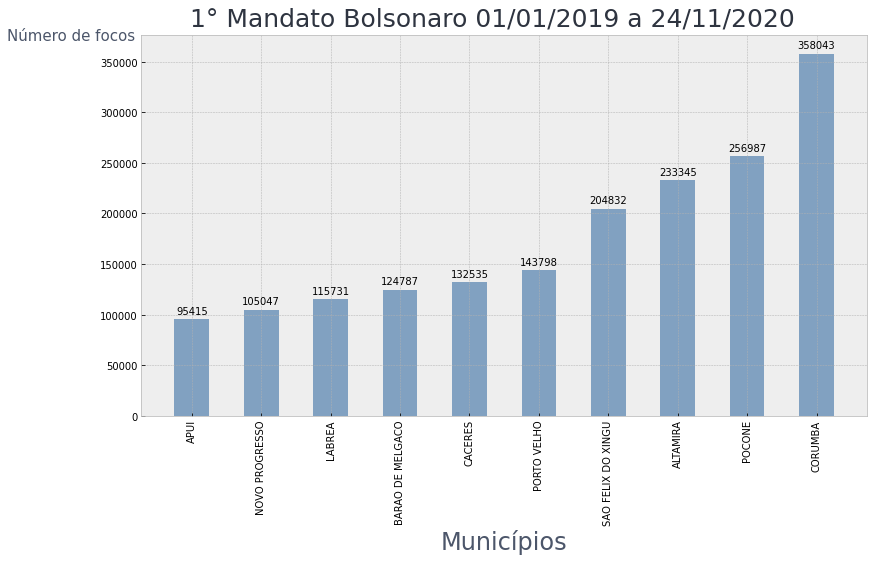

In [81]:
focos = df.groupby('municipio').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

municipios = list(n_focos.keys())
municipios = list(dict.fromkeys(municipios))
dados_grafico = {'municipios': [], 'focos': []}
for municipio in municipios:
    if(municipio in n_focos.keys()):
        dados_grafico['municipios'].append(municipio)
        dados_grafico['focos'].append(n_focos[municipio])
             
labels = dados_grafico['municipios']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Municípios',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Bolsonaro 01/01/2019 a 24/11/2020',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()

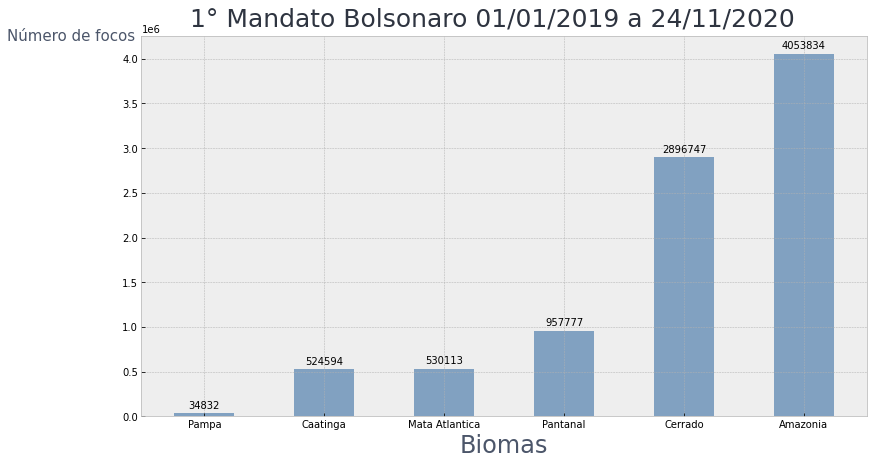

In [82]:
focos = df.groupby('bioma').size().sort_values().tail(10)
n_focos = dict(focos)
dados = {}

biomas = list(n_focos.keys())
biomas = list(dict.fromkeys(biomas))
dados_grafico = {'biomas': [], 'focos': []}
for bioma in biomas:
    if(bioma in n_focos.keys()):
        dados_grafico['biomas'].append(bioma)
        dados_grafico['focos'].append(n_focos[bioma])
             
labels = dados_grafico['biomas']
focos = dados_grafico['focos']

x = np.arange(len(labels)) 
width = 0.5

fig, ax = plt.subplots(1,1,figsize=(13,7))
rects2 = ax.bar(x, focos, width,color = '#81A1C1')

plt.xlabel('Biomas',color ='#4C566A', fontsize=24, ha='center')
plt.figtext(.050,.87,'Número de focos',color ='#4C566A', fontsize=15, ha='center')
plt.figtext(.5,.9,'1° Mandato Bolsonaro 01/01/2019 a 24/11/2020',color ='#2E3440', fontsize=25, ha='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.style.use("bmh")
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='horizontal')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

 


autolabel(rects2)
plt.show()